In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [48]:
project_dir="results/projects/240117llama7b_10"
#project_dir="results/projects/240117llama7b"


In [61]:
result_list=[]

def load_data(project_dir,prefix="test_"):
    for path in glob.glob(f"{project_dir}/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        generation=path.split("/")[-1].split("_")[1]
        generation=int(generation)

        mode=path.split("/")[-1].split("_")[0]
        d["generation"]=generation
        d["mode"]=mode

        #count self_reasoning data
        self_reasoning_records=0
        for gen in range(0,generation+1):
            self_reasoning_records+=len(glob.glob(f"{project_dir}/self_reasoning/{gen}_*.json"))

        d["Self-reasoning records"]=self_reasoning_records
        result_list.append(d)

    return result_list

#train_result_list=load_data(project_dir,"train_")
#test_result_list=load_data(project_dir,"test_")
result_list=load_data(project_dir,"")

In [62]:
result_df=pd.DataFrame(result_list)
result_df

,MSE,MAE,R2,Answer ratio,plot,generation,mode,Self-reasoning records
0,9205.312181,83.775532,-0.009656,0.940000,"[{'name': 'Hexanoic acid', 'smiles': 'CCCCCC(=...",9,test,159
1,3863.094309,46.792553,-0.319632,0.940000,"[{'name': 'gestonorone caproate', 'smiles': 'C...",3,train,75
2,11405.618177,88.313542,-0.290089,0.960000,"[{'name': 'Hexanoic acid', 'smiles': 'CCCCCC(=...",0,test,18
3,3699.398670,44.958511,-0.059274,0.940000,"[{'name': 'cyclohexanol, 4-chloro-, trans-', '...",7,train,142
4,7832.317500,76.828723,0.121175,0.940000,"[{'name': 'Hexanoic acid', 'smiles': 'CCCCCC(=...",8,test,157
5,4653.059667,51.924444,-0.656815,0.900000,"[{'name': 'methyl 3-chloro-4-methoxybenzoate',...",5,train,105
6,4544.335000,56.536000,0.181105,0.892857,"[{'name': '2-iodoaniline', 'smiles': 'c1ccc(c(...",1,train,38
7,10537.091968,83.096809,-0.177565,0.940000,"[{'name': 'Hexanoic acid', 'smiles': 'CCCCCC(=...",5,test,105
8,6558.808750,64.258333,-0.492178,0.600000,"[{'name': 'benzoic acid, 2-hydroxy-, 2-hydroxy...",0,train,18
9,3162.707602,45.696939,0.027526,0.980000,"[{'name': 'benzoic acid, 2-hydroxy-, 2-hydroxy...",8,train,157


<Axes: xlabel='generation', ylabel='MSE'>

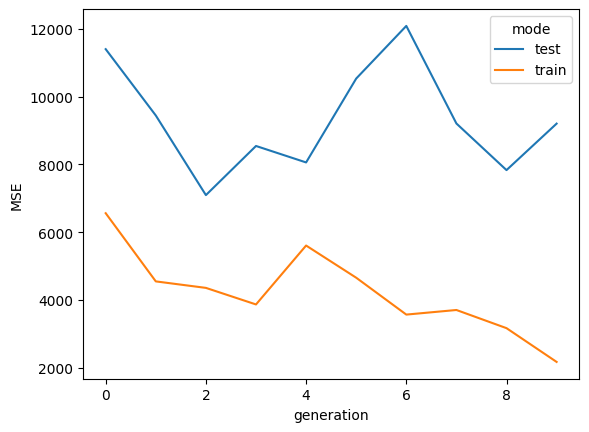

In [63]:
sns.lineplot(x="generation",y="MSE",hue="mode",data=result_df)

#plt.ylim(4000,12000)

<Axes: xlabel='Self-reasoning records', ylabel='MSE'>

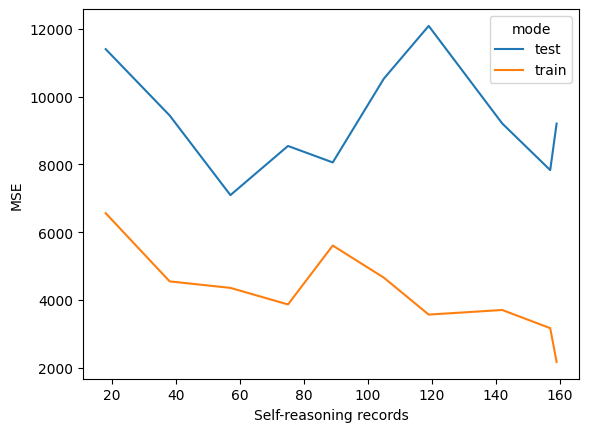

In [64]:

sns.lineplot(x="Self-reasoning records",y="MSE",hue="mode",data=result_df)